In [36]:
import numpy as np
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import interpolate
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
def calcular_desviacion(arreglo):
    return np.std(arreglo)

In [3]:
datos = [
    [4, 27, 23, 36, 13, 1],
    [19, 30, 12, 8, 3, 17],
    [35, 28, 4, 20, 1, 25],
    [23, 32, 16, 11, 31, 4],
    [9, 3, 18, 11, 33, 27],
    [19, 3, 36, 5, 28, 18],
    [7, 36, 19, 27, 37, 31],
    [4, 18, 14, 5, 29, 28],
    [8, 33, 9, 36, 23, 1],
    [28, 31, 1, 11, 10, 38],
    [30, 14, 38, 36, 31, 7],
    [33, 18, 29, 12, 7, 10],
    [35, 11, 7, 19, 16, 1],
    [26, 10, 17, 4, 25, 8],
    [28, 7, 5, 2, 33, 3],
    [2, 33, 1, 17, 8, 5],
    [7, 26, 10, 15, 3, 25],
    [7, 6, 5, 1, 21, 19],
    [21, 3, 7, 27, 18, 4],
    [30, 13, 14, 25, 3, 2],
    [29, 17, 25, 19, 27, 2],
    [22, 14, 25, 6, 8, 29],
    [36, 14, 3, 30, 2, 12],
    [8, 16, 20, 21, 6, 27],
    [7, 18, 14, 4, 21, 9],
    [34, 8, 7, 21, 13, 10],
    [2, 32, 36, 34, 10, 20],
    [8, 15, 11, 12, 37, 33],
    [9, 12, 33, 19, 25, 36],
    [5, 4, 11, 15, 7, 20],
    [16, 37, 13, 29, 32, 2],
    [1, 19, 3, 31, 9, 28],
    [26, 22, 15, 37, 38, 23],
    [35, 14, 29, 27, 26, 30],
    [11, 36, 2, 17, 24, 6],
    [36, 9, 4, 11, 2, 23],
    [30, 9, 29, 22, 16, 35],
    [7, 17, 9, 11, 2, 26],
    [20, 15, 38, 2, 6, 23],
    [35, 19, 29, 34, 25, 27],
    [30, 2, 9, 38, 37, 31],
    [12, 33, 14, 3, 4, 29],
    [14, 23, 25, 26, 34, 12],
    [14, 3, 30, 9, 12, 13],
    [21, 7, 2, 26, 19, 20],
    [16, 28, 2, 3, 38, 20],
    [25, 31, 24, 10, 4, 12],
    [6, 18, 4, 12, 37, 15],
    [4, 27, 3, 26, 20, 21],
    [29, 37, 32, 11, 16, 7],
    [23, 35, 28, 37, 11, 22],
    [2, 32, 37, 23, 18, 16],
    [22, 25, 20, 11, 21, 19],
    [31, 38, 10, 12, 36, 25],
    [24, 33, 19, 36, 12, 38],
    [18, 9, 25, 6, 28, 23],
    [5, 31, 33, 10, 15, 24],
    [17, 7, 3, 8, 35, 25],
    [2, 25, 5, 35, 18, 38]
]
#[2, 25, 5, 35, 18, 38]

In [4]:
# Opcion 2 con numeros generados al azar para adivinar

In [5]:
# Convertir la lista de datos a un arreglo numpy
X_train = np.array(datos)

# Crear etiquetas para los datos, puedes asignar un valor específico si conoces el resultado
# En este caso, se asumirá que no conocemos el resultado, por lo que se puede asignar cualquier valor
y_train = np.arange(len(datos))

# Inicializar y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Generar 10 posibles conjuntos de números utilizando el modelo entrenado
for i in range(10):
    # Generar un nuevo conjunto de números aleatoriabmente (puedes ajustar esta parte según tus necesidades)
    nuevo_dato = np.random.choice(range(1, 40), size=6, replace=False).reshape(1, -1)

    # Realizar la predicción utilizando el modelo entrenado
    prediccion = modelo_svm.predict(nuevo_dato)

    # El resultado de la predicción será el índice del arreglo válido más cercano en tus datos de entrenamiento
    # Puedes usar este índice para obtener el conjunto de números correspondiente
    nuevo_conjunto = datos[prediccion[0]]

    # Imprimir el nuevo conjunto de números predichos
    print("Posibilidad", i+1, ":", nuevo_conjunto)


Posibilidad 1 : [4, 27, 3, 26, 20, 21]
Posibilidad 2 : [35, 11, 7, 19, 16, 1]
Posibilidad 3 : [2, 32, 37, 23, 18, 16]
Posibilidad 4 : [21, 7, 2, 26, 19, 20]
Posibilidad 5 : [31, 38, 10, 12, 36, 25]
Posibilidad 6 : [17, 7, 3, 8, 35, 25]
Posibilidad 7 : [8, 16, 20, 21, 6, 27]
Posibilidad 8 : [9, 12, 33, 19, 25, 36]
Posibilidad 9 : [26, 10, 17, 4, 25, 8]
Posibilidad 10 : [17, 7, 3, 8, 35, 25]


In [6]:
# Función para calcular la desviación estándar de un conjunto de números
def calcular_desviacion(conjunto):
    return np.std(conjunto)

# Función para filtrar los datos de entrenamiento según el rango de desviación estándar deseado
def filtrar_datos(datos, desviaciones, rango):
    indices_filtrados = np.where((desviaciones >= rango[0]) & (desviaciones <= rango[1]))[0]
    datos_filtrados = [datos[i] for i in indices_filtrados]
    desviaciones_filtradas = desviaciones[indices_filtrados]
    return datos_filtrados, desviaciones_filtradas

# Convertir la lista de datos a un arreglo numpy
X_train = np.array(datos)

# Calcular la desviación estándar de cada conjunto de entrenamiento
desviaciones_train = np.array([calcular_desviacion(conjunto) for conjunto in datos])

# Definir el rango deseado de desviación estándar para el entrenamiento
rango_desviacion = (10.00, 11.00)

# Filtrar los datos de entrenamiento según el rango de desviación estándar deseado
X_train, desviaciones_train = filtrar_datos(X_train, desviaciones_train, rango_desviacion)

# Convertir la lista de desviaciones a un arreglo numpy y darle la forma adecuada para concatenarla con X_train
desviaciones_train = desviaciones_train.reshape(-1, 1)

# Concatenar la desviación estándar con los datos de entrenamiento
X_train = np.concatenate((X_train, desviaciones_train), axis=1)

# Crear etiquetas para los datos, puedes asignar un valor específico si conoces el resultado
# En este caso, se asumirá que no conocemos el resultado, por lo que se puede asignar cualquier valor
y_train = np.arange(len(X_train))

# Inicializar y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Una vez que el modelo está entrenado, puedes usarlo para predecir el próximo conjunto de 6 números
# Suponiendo que tienes un nuevo conjunto de datos que quieres predecir, almacenado en una lista llamada "nuevo_dato"
nuevo_dato = [[31, 38, 10, 12, 36, 25]]  # Por ejemplo, aquí tienes un nuevo conjunto de 6 números

# Calcular la desviación estándar del nuevo conjunto
desviacion_nuevo_dato = calcular_desviacion(nuevo_dato[0])

# Convertir la desviación estándar del nuevo conjunto a un arreglo numpy y darle la forma adecuada para concatenarla con nuevo_dato
desviacion_nuevo_dato = np.array([desviacion_nuevo_dato]).reshape(1, -1)

# Concatenar la desviación estándar con el nuevo dato
nuevo_dato_con_desviacion = np.concatenate((nuevo_dato, desviacion_nuevo_dato), axis=1)

# Realizar la predicción utilizando el modelo entrenado
prediccion = modelo_svm.predict(nuevo_dato_con_desviacion)

# El resultado de la predicción será el índice del arreglo válido más cercano en tus datos de entrenamiento
# Puedes usar este índice para obtener el conjunto de números correspondiente
nuevo_conjunto = datos[prediccion[0]]

# Imprimir el nuevo conjunto de números predichos
print("El próximo conjunto de números predichos es:", nuevo_conjunto)
desviacion_resultado = calcular_desviacion(nuevo_conjunto)
print(desviacion_resultado)

El próximo conjunto de números predichos es: [4, 18, 14, 5, 29, 28]
9.877021593352701


In [7]:
# Función para calcular la desviación estándar de un conjunto de números
def calcular_desviacion(conjunto):
    return np.std(conjunto)

# Convertir la lista de datos a un arreglo numpy
X = np.array(datos)

# Calcular la desviación estándar de cada conjunto de entrenamiento
desviaciones = np.array([calcular_desviacion(conjunto) for conjunto in datos])

# Definir el rango deseado de desviación estándar para el entrenamiento
rango_desviacion = (12.00, 13.00)

# Filtrar los datos según el rango de desviación estándar deseado
indices_filtrados = np.where((desviaciones >= rango_desviacion[0]) & (desviaciones <= rango_desviacion[1]))[0]
X_filtrado = X[indices_filtrados]
desviaciones_filtradas = desviaciones[indices_filtrados]

# Dividir los datos filtrados en conjuntos de entrenamiento y prueba
X_train, X_test, desviaciones_train, desviaciones_test = train_test_split(X_filtrado, desviaciones_filtradas, test_size=0.2, random_state=42)

# Convertir la lista de desviaciones a un arreglo numpy y darle la forma adecuada para concatenarla con X_train
desviaciones_train = desviaciones_train.reshape(-1, 1)

# Concatenar la desviación estándar con los datos de entrenamiento
X_train = np.concatenate((X_train, desviaciones_train), axis=1)

# Crear etiquetas para los datos de entrenamiento
y_train = np.arange(len(X_train))

# Inicializar y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
resultados_prediccion = []
for nuevo_dato in X_test:
    # Calcular la desviación estándar del nuevo conjunto
    desviacion_nuevo_dato = calcular_desviacion(nuevo_dato)

    # Convertir la desviación estándar del nuevo conjunto a un arreglo numpy y darle la forma adecuada para concatenarla con nuevo_dato
    desviacion_nuevo_dato = np.array([desviacion_nuevo_dato]).reshape(1, -1)

    # Concatenar la desviación estándar con el nuevo dato
    nuevo_dato_con_desviacion = np.concatenate((nuevo_dato.reshape(1, -1), desviacion_nuevo_dato), axis=1)

    # Realizar la predicción utilizando el modelo entrenado
    prediccion = modelo_svm.predict(nuevo_dato_con_desviacion)

    # Obtener el conjunto de números correspondiente a la predicción final
    nuevo_conjunto = datos[prediccion[0]]

    # Agregar el nuevo conjunto predicho a los resultados de predicción
    resultados_prediccion.append(nuevo_conjunto)

# Imprimir los resultados de predicción
print("Resultados de predicción:")
for i, resultado in enumerate(resultados_prediccion):
    print(f"Predicción {i + 1}: {resultado}")
    print(calcular_desviacion(resultado))

Resultados de predicción:
Predicción 1: [35, 28, 4, 20, 1, 25]
12.401836781523757
Predicción 2: [23, 32, 16, 11, 31, 4]
10.21028892833107


1. datos: Esta variable contiene los conjuntos de números válidos que se utilizan para entrenar el modelo y para realizar predicciones. Puedes modificar esta variable agregando más conjuntos de números válidos para proporcionar más variabilidad al modelo.
   2. 
rango_desviacion: Este es el rango deseado de desviación estándar que deseas para los conjuntos de números. Puedes ajustar este rango según tus requisitos. Por ejemplo, si deseas que los conjuntos de números tengan una desviación estándar más estrecha, puedes reducir el rango, y viceversa
   .3. 
test_size: Esta variable determina el tamaño del conjunto de prueba en la división de entrenamiento/prueba. Un valor de 0.2 significa que el 20% de los datos se utilizarán como conjunto de prueba, y el 80% restante se utilizará como conjunto de entrenamiento. Puedes ajustar este valor para cambiar la proporción de datos de entrenamiento/prueb
   a4. .
modelo_svm: Aquí se inicializa el modelo SVM. En el ejemplo dado, se utiliza un modelo SVM lineal con SVC(kernel='linear'). Puedes experimentar con diferentes tipos de kernels, como polinomial (kernel='poly') o RBF (kernel='rbf'), para ver cuál funciona mejor para tus dat
   o5. s.
random_state: Este parámetro se utiliza para controlar la aleatoriedad en la división de datos. Si proporcionas un valor fijo a random_state, obtendrás la misma división de datos cada vez que ejecutes el código. Esto es útil para reproducir resultados. Sin embargo, si deseas una división aleatoria diferente en cada ejecución, puedes omitir este parámetro o proporcionar un valor diferente.

In [8]:
# Función para calcular la desviación estándar de un conjunto de números
def calcular_desviacion(conjunto):
    return np.std(conjunto)

# Convertir la lista de datos a un arreglo numpy
X = np.array(datos)

# Calcular la desviación estándar de cada conjunto de entrenamiento
desviaciones = np.array([calcular_desviacion(conjunto) for conjunto in datos])

# Definir el rango deseado de desviación estándar para el entrenamiento
rango_desviacion = (8.00, 10.00)

# Filtrar los datos según el rango de desviación estándar deseado
indices_filtrados = np.where((desviaciones >= rango_desviacion[0]) & (desviaciones <= rango_desviacion[1]))[0]
X_filtrado = X[indices_filtrados]
desviaciones_filtradas = desviaciones[indices_filtrados]

# Dividir los datos filtrados en conjuntos de entrenamiento y prueba
X_train, X_test, desviaciones_train, desviaciones_test = train_test_split(X_filtrado, desviaciones_filtradas, test_size=0.3, random_state=42)

# Convertir la lista de desviaciones a un arreglo numpy y darle la forma adecuada para concatenarla con X_train
desviaciones_train = desviaciones_train.reshape(-1, 1)

# Concatenar la desviación estándar con los datos de entrenamiento
X_train = np.concatenate((X_train, desviaciones_train), axis=1)

# Crear etiquetas para los datos de entrenamiento
y_train = np.arange(len(X_train))

# Inicializar y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
resultados_prediccion = []
for nuevo_dato, desviacion_nuevo_dato in zip(X_test, desviaciones_test):
    print("Desviación estándar del nuevo dato:", desviacion_nuevo_dato)
    print("Nuevo dato:", nuevo_dato)
    
    # Convertir la desviación estándar del nuevo conjunto a un arreglo numpy y darle la forma adecuada para concatenarla con nuevo_dato
    desviacion_nuevo_dato = np.array([desviacion_nuevo_dato]).reshape(1, -1)

    # Concatenar la desviación estándar con el nuevo dato
    nuevo_dato_con_desviacion = np.concatenate((nuevo_dato.reshape(1, -1), desviacion_nuevo_dato), axis=1)

    # Realizar la predicción utilizando el modelo entrenado
    prediccion = modelo_svm.predict(nuevo_dato_con_desviacion)

    # Obtener el conjunto de números correspondiente a la predicción final
    nuevo_conjunto = datos[prediccion[0]]

    # Agregar el nuevo conjunto predicho a los resultados de predicción
    resultados_prediccion.append(nuevo_conjunto)

# Imprimir los resultados de predicción
print("Resultados de predicción:")
for i, resultado in enumerate(resultados_prediccion):
    print(f"Predicción {i + 1}: {resultado}")
    print(calcular_desviacion(resultado))

Desviación estándar del nuevo dato: 8.629728977333079
Nuevo dato: [19 30 12  8  3 17]
Desviación estándar del nuevo dato: 9.877021593352701
Nuevo dato: [ 4 18 14  5 29 28]
Desviación estándar del nuevo dato: 9.464847243000456
Nuevo dato: [34  8  7 21 13 10]
Desviación estándar del nuevo dato: 9.140872800534726
Nuevo dato: [21  3  7 27 18  4]
Desviación estándar del nuevo dato: 8.366600265340756
Nuevo dato: [26 10 17  4 25  8]
Desviación estándar del nuevo dato: 9.568466729604882
Nuevo dato: [25 31 24 10  4 12]
Resultados de predicción:
Predicción 1: [7, 36, 19, 27, 37, 31]
10.462897410479671
Predicción 2: [19, 3, 36, 5, 28, 18]
11.682132605916705
Predicción 3: [4, 18, 14, 5, 29, 28]
9.877021593352701
Predicción 4: [4, 18, 14, 5, 29, 28]
9.877021593352701
Predicción 5: [19, 3, 36, 5, 28, 18]
11.682132605916705
Predicción 6: [23, 32, 16, 11, 31, 4]
10.21028892833107


# Frecuencia de aparicion

In [9]:
# Convertir la matriz en una lista plana
numeros = [numero for sublist in datos for numero in sublist]

# Calcular la frecuencia de aparición de cada número
frecuencia_numeros = Counter(numeros)

# Imprimir la frecuencia de aparición de cada número
for numero, frecuencia in frecuencia_numeros.items():
    print(f"Número {numero}: {frecuencia} veces")

Número 4: 13 veces
Número 27: 9 veces
Número 23: 10 veces
Número 36: 12 veces
Número 13: 5 veces
Número 1: 8 veces
Número 19: 12 veces
Número 30: 8 veces
Número 12: 12 veces
Número 8: 9 veces
Número 3: 14 veces
Número 17: 7 veces
Número 35: 8 veces
Número 28: 9 veces
Número 20: 9 veces
Número 25: 15 veces
Número 32: 5 veces
Número 16: 8 veces
Número 11: 12 veces
Número 31: 9 veces
Número 9: 11 veces
Número 18: 10 veces
Número 33: 10 veces
Número 5: 8 veces
Número 7: 15 veces
Número 37: 9 veces
Número 14: 10 veces
Número 29: 10 veces
Número 10: 9 veces
Número 38: 9 veces
Número 26: 8 veces
Número 2: 16 veces
Número 15: 7 veces
Número 6: 7 veces
Número 21: 8 veces
Número 22: 5 veces
Número 34: 4 veces
Número 24: 4 veces


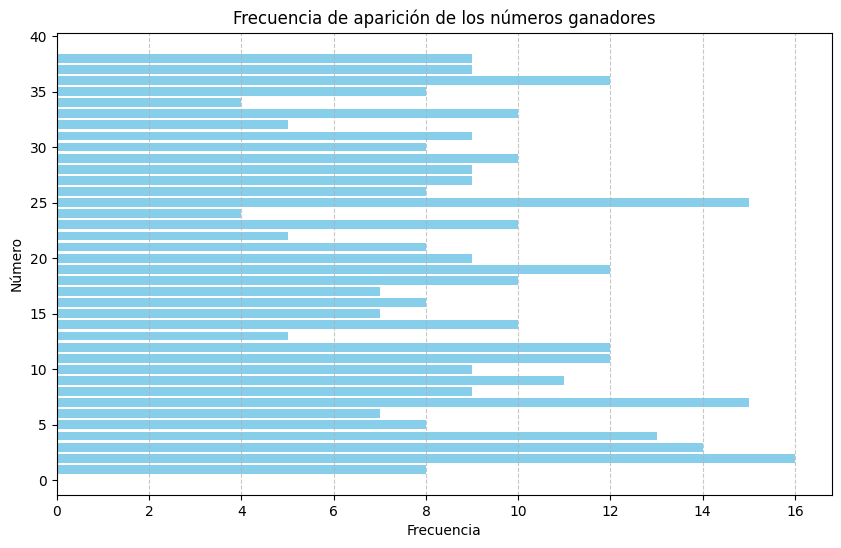

In [10]:
df = pd.DataFrame(datos, columns=['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6'])

# Calcular la frecuencia de cada número
frecuencia = df.values.flatten()
numeros, conteo = np.unique(frecuencia, return_counts=True)

# Ordenar los números según su frecuencia
indices_ordenados = np.argsort(conteo)
numeros_ordenados = numeros[indices_ordenados]
conteo_ordenado = conteo[indices_ordenados]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(numeros_ordenados, conteo_ordenado, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Número')
plt.title('Frecuencia de aparición de los números ganadores')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Datos de muestra
data = {
    'fecha': ['21/10/2023', '28/10/2023', '31/10/2023', '4/11/2023', '9/11/2023', '11/11/2023', '14/11/2023', '18/11/2023', '21/11/2023', '25/11/2023', '28/11/2023', '2/12/2023', '5/12/2023', '9/12/2023', '12/12/2023', '16/12/2023', '19/12/2023', '23/12/2023', '26/12/2023', '30/12/2023', '2/1/2024', '6/1/2024', '11/1/2024', '13/1/2024', '16/1/2024', '20/1/2024', '23/1/2024', '27/1/2024', '30/1/2024', '3/2/2024', '6/2/2024', '9/2/2024', '14/2/2024', '17/2/2024', '20/2/2024', '24/2/2024', '27/2/2024', '2/3/2024', '5/3/2024', '9/3/2024', '12/3/2024', '16/3/2024', '19/3/2024', '23/3/2024', '26/3/2024', '30/3/2024', '2/4/2024', '6/4/2024', '9/4/2024', '13/4/2024', '16/4/2024', '20/4/2024', '23/4/2024'],
    'posicion-1': [4, 19, 35, 23, 9, 19, 7, 4, 8, 28, 30, 33, 35, 26, 28, 2, 7, 7, 21, 30, 29, 22, 36, 8, 7, 34, 2, 8, 9, 5, 16, 1, 26, 35, 11, 36, 30, 7, 20, 35, 30, 12, 14, 14, 2, 6, 4, 29, 23, 22, 2, 25, 6, 4, 29, 23, 22],
    'posicion-2': [27, 30, 28, 32, 3, 3, 36, 18, 33, 31, 14, 18, 11, 10, 7, 33, 26, 6, 3, 13, 17, 14, 14, 16, 18, 8, 32, 15, 12, 4, 37, 19, 22, 14, 9, 18, 17, 15, 9, 28, 2, 33, 23, 3, 12, 2, 25, 32, 25, 23, 20, 24, 37, 32, 35, 25],
    'posicion-3': [23, 12, 4, 16, 18, 36, 19, 14, 9, 1, 38, 29, 7, 17, 5, 1, 10, 5, 30, 14, 25, 25, 3, 20, 14, 7, 36, 11, 33, 11, 20, 3, 1, 11, 29, 9, 29, 2, 38, 38, 2, 38, 9, 2, 3, 30, 25, 20, 37, 12, 6, 37, 11, 20],
    'posicion-4': [36, 8, 20, 11, 11, 5, 27, 5, 36, 11, 36, 12, 19, 4, 2, 17, 15, 1, 27, 25, 19, 6, 30, 21, 27, 1, 34, 34, 19, 31, 15, 15, 21, 17, 22, 11, 22, 16, 3, 11, 22, 34, 13, 9, 7, 6, 3, 11, 37, 10, 18, 11, 21],
    'posicion-5': [13, 3, 1, 31, 33, 28, 37, 29, 23, 10, 31, 7, 16, 25, 33, 8, 3, 21, 18, 3, 27, 8, 2, 6, 18, 21, 9, 2, 25, 9, 20, 29, 30, 14, 27, 22, 37, 38, 2, 2, 30, 11, 4, 6, 38, 15, 7, 28, 38, 27, 37, 11, 19],
    'posicion-6': [1, 17, 25, 4, 27, 18, 31, 28, 1, 38, 7, 10, 1, 8, 3, 5, 25, 19, 4, 2, 2, 29, 29, 27, 9, 19, 26, 20, 36, 28, 20, 20, 13, 18, 12, 4, 33, 16, 26, 26, 26, 19, 20, 13, 23, 19, 22, 26, 20, 11, 21, 22, 20],
    'premio':  ['B/.500,000.00', 'B/.533,000.00', 'B/.533,000.00', 'B/.594,131.00', 'B/.594,131.00', 'B/.658,300.00', 'B/.696,483.00', 'B/.696,483.00', 'B/.696,483.00', 'B/.812,436.00', 'B/.812,436.00', 'B/.812,436.00', 'B/.932,730.00', 'B/.932,730.00', 'B/.932,730.00', 'B/.621,986.00', 'B/.671,856.00', 'B/.717,916.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.500,000.00', 'B/.689,807.00', 'B/.689,807.00', 'B/.689,807.00', 'B/.760,663.00', 'B/.782,818.00', 'B/.500,000.00', 'B/.521,819.00', 'B/.541,573.00', 'B/.560,604.00', 'B/.560,604.00', 'B/.595,236.00', 'B/.614,356.00', 'B/.636,013.00', 'B/.654,267.00', 'B/.674,661.00', 'B/.702,946.00', 'B/.724,447.00', 'B/.742,412.00', 'B/.764,477.00', 'B/.784,092.00', 'B/.805,375.00', 'B/.825,739.00', 'B/.500,000.00', 'B/.517,540.00', 'B/.539,323.00', 'B/.557,248.00', 'B/.578,394.00', 'B/.597,428.00', 'B/.618,082.00', 'B/.618,082.00', 'B/.618,082.00', 'B/.618,082.00', 'B/.618,082.00'],
    'Ganador': [False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
}

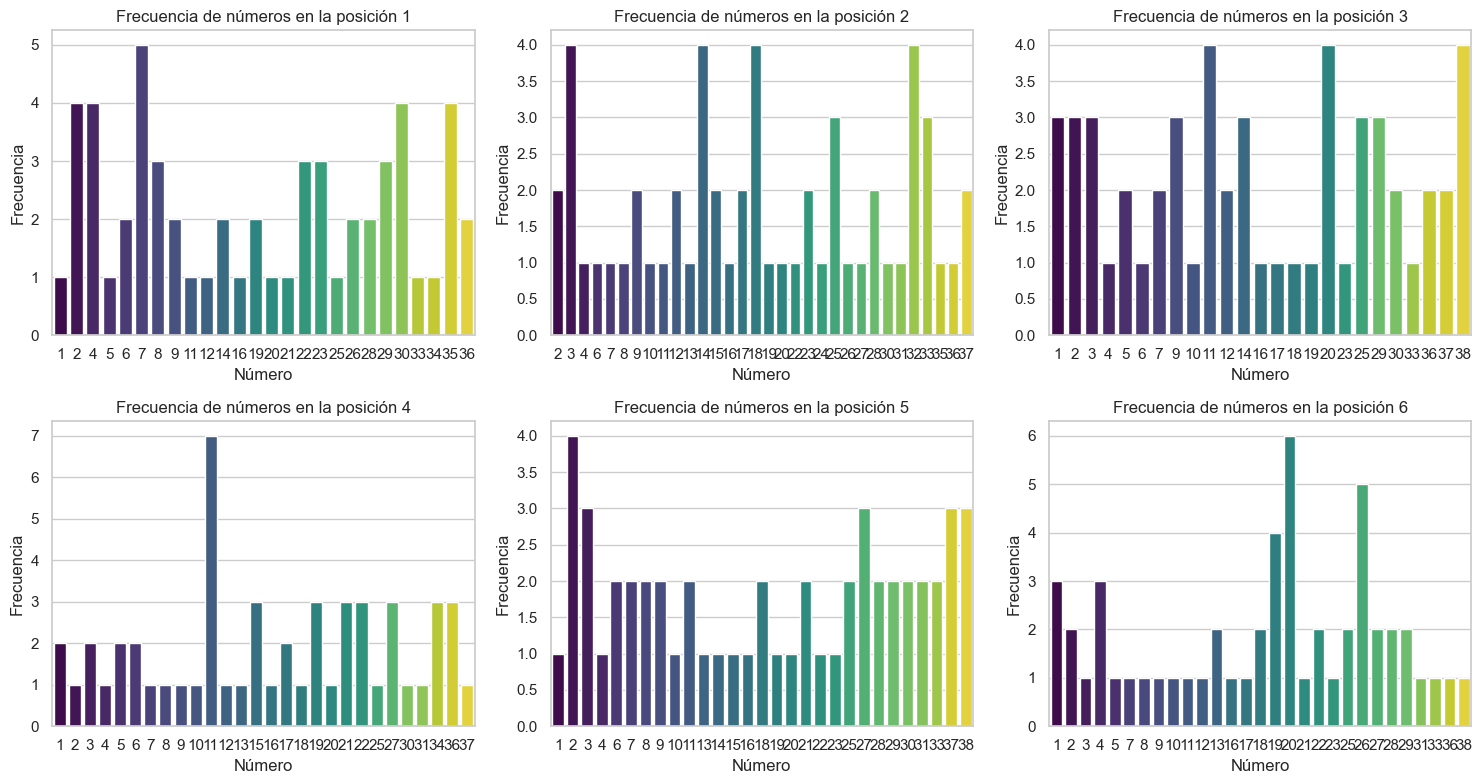

In [12]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear una sola figura con subgráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Gráfico de barras para visualizar la frecuencia de cada número en cada posición
for i, ax in enumerate(axes.flat, start=1):
    sns.countplot(x=f'posicion-{i}', hue=f'posicion-{i}', data=data, palette='viridis', ax=ax, legend=False)
    ax.set_title(f'Frecuencia de números en la posición {i}')
    ax.set_xlabel('Número')
    ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()
plt.show()


# Numeros ganadores por posicion:
calcula la media, la mediana, la desviación estándar y el rango de cada posición de los números ganadores:

In [13]:

# Obtener los números ganadores en cada posición
numeros_ganadores = [data[f'posicion-{i}'] for i in range(1, 7)]

# Calcular estadísticos para cada posición
for i, numeros in enumerate(numeros_ganadores, start=1):
    print(f"Estadísticas para la posición {i}:")
    print("  Media:", np.mean(numeros))
    print("  Mediana:", np.median(numeros))
    print("  Desviación estándar:", np.std(numeros))
    print("  Rango:", np.max(numeros) - np.min(numeros))
    print()

Estadísticas para la posición 1:
  Media: 17.87719298245614
  Mediana: 19.0
  Desviación estándar: 11.455589573283852
  Rango: 35

Estadísticas para la posición 2:
  Media: 19.160714285714285
  Mediana: 18.0
  Desviación estándar: 10.405659150046132
  Rango: 35

Estadísticas para la posición 3:
  Media: 17.12962962962963
  Mediana: 14.0
  Desviación estándar: 12.05857048265042
  Rango: 37

Estadísticas para la posición 4:
  Media: 17.07547169811321
  Mediana: 16.0
  Desviación estándar: 10.32646180725742
  Rango: 36

Estadísticas para la posición 5:
  Media: 18.71698113207547
  Mediana: 19.0
  Desviación estándar: 11.872558113964123
  Rango: 37

Estadísticas para la posición 6:
  Media: 17.90566037735849
  Mediana: 20.0
  Desviación estándar: 9.810014426822612
  Rango: 37



Estas estadísticas proporcionan información sobre la distribución de los números ganadores en cada posición de los sorteos. Aquí hay una interpretación para cada estadístico:

Media: Es el promedio de los números ganadores en esa posición a lo largo de todos los sorteos. Por ejemplo, para la posición 1, la media es aproximadamente 17.88. Esto significa que, en promedio, los números ganadores en la posición 1 tienden a estar alrededor de 17.88.
Mediana: Es el valor medio de los números ganadores en esa posición cuando están ordenados de menor a mayor. Por ejemplo, para la posición 2, la mediana es 18. Esto significa que la mitad de los números ganadores en la posición 2 son menores o iguales a 18, y la otra mitad son mayores o iguales a 18.
Desviación estándar: Mide la dispersión o la variabilidad de los números ganadores en esa posición con respecto a la media. Una desviación estándar más grande indica una mayor dispersión de los datos alrededor de la media. Por ejemplo, para la posición 3, la desviación estándar es aproximadamente 12.06. Esto sugiere que los números ganadores en la posición 3 tienden a estar más dispersos alrededor de la media, en comparación con otras posiciones.
Rango: Es la diferencia entre el número más grande y el número más pequeño en esa posición. Por ejemplo, para la posición 4, el rango es 36. Esto indica que los números ganadores en la posición 4 pueden variar en un rango de 36 unidades.
En resumen, estas estadísticas te dan una idea de la tendencia central, la dispersión y la amplitud de los números ganadores en cada posición, lo que puede ayudarte a entender mejor la distribución de los números en los sorteos y a identificar posibles patrones o tendencias.

In [14]:
# Datos de entrada
X = np.array(data['posicion-1'])  # Variable independiente
y = np.array(data['premio'])      # Variable dependiente

# Imprimir el tamaño de X y y
print("Tamaño de X:", len(X))
print("Tamaño de y:", len(y))

Tamaño de X: 57
Tamaño de y: 57


In [15]:
# Calcular la desviación estándar para cada conjunto
desviaciones_estandar = [np.std(sublista) for sublista in datos]

# Imprimir resultados
for i, desviacion in enumerate(desviaciones_estandar, start=1):
    desviacion_redondeada = round(desviacion, 2)
    print(f"Bucle {i}: Desviación estándar = {desviacion:.2f}")
    # Almacenar en la lista después de imprimir
    desviaciones_estandar[i-1] = desviacion_redondeada

Bucle 1: Desviación estándar = 12.50
Bucle 2: Desviación estándar = 8.63
Bucle 3: Desviación estándar = 12.40
Bucle 4: Desviación estándar = 10.21
Bucle 5: Desviación estándar = 10.43
Bucle 6: Desviación estándar = 11.68
Bucle 7: Desviación estándar = 10.46
Bucle 8: Desviación estándar = 9.88
Bucle 9: Desviación estándar = 13.19
Bucle 10: Desviación estándar = 13.23
Bucle 11: Desviación estándar = 11.47
Bucle 12: Desviación estándar = 9.72
Bucle 13: Desviación estándar = 10.75
Bucle 14: Desviación estándar = 8.37
Bucle 15: Desviación estándar = 12.56
Bucle 16: Desviación estándar = 11.15
Bucle 17: Desviación estándar = 8.67
Bucle 18: Desviación estándar = 7.45
Bucle 19: Desviación estándar = 9.14
Bucle 20: Desviación estándar = 10.34
Bucle 21: Desviación estándar = 9.03
Bucle 22: Desviación estándar = 8.60
Bucle 23: Desviación estándar = 12.79
Bucle 24: Desviación estándar = 7.36
Bucle 25: Desviación estándar = 6.04
Bucle 26: Desviación estándar = 9.46
Bucle 27: Desviación estándar = 1

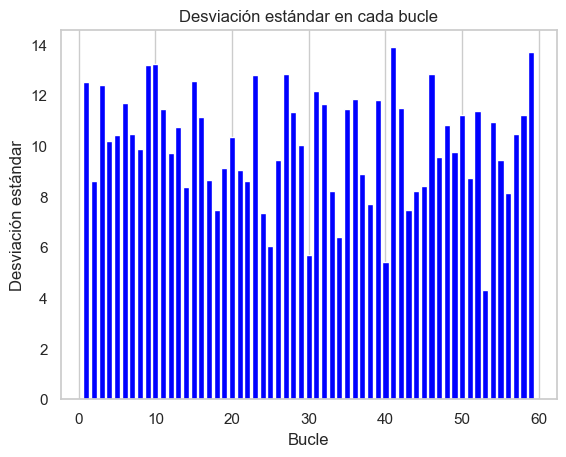

In [16]:
# Desviaciones estándar proporcionadas
# Índices para los bucles
bucles = list(range(1, len(desviaciones_estandar) + 1))

# Crear el gráfico de barras
plt.bar(bucles, desviaciones_estandar, color='blue')
plt.xlabel('Bucle')
plt.ylabel('Desviación estándar')
plt.title('Desviación estándar en cada bucle')
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

In [70]:

# Datos de entrenamiento (52 combinaciones previas)
combinaciones_previas = [
    [4, 27, 23, 36, 13, 1],
    [19, 30, 12, 8, 3, 17],
    [35, 28, 4, 20, 1, 25],
    [23, 32, 16, 11, 31, 4],
    [9, 3, 18, 11, 33, 27],
    [19, 3, 36, 5, 28, 18],
    [7, 36, 19, 27, 37, 31],
    [4, 18, 14, 5, 29, 28],
    [8, 33, 9, 36, 23, 1],
    [28, 31, 1, 11, 10, 38],
    [30, 14, 38, 36, 31, 7],
    [33, 18, 29, 12, 7, 10],
    [35, 11, 7, 19, 16, 1],
    [26, 10, 17, 4, 25, 8],
    [28, 7, 5, 2, 33, 3],
    [2, 33, 1, 17, 8, 5],
    [7, 26, 10, 15, 3, 25],
    [7, 6, 5, 1, 21, 19],
    [21, 3, 7, 27, 18, 4],
    [30, 13, 14, 25, 3, 2],
    [29, 17, 25, 19, 27, 2],
    [22, 14, 25, 6, 8, 29],
    [36, 14, 3, 30, 2, 12],
    [8, 16, 20, 21, 6, 27],
    [7, 18, 14, 4, 21, 9],
    [34, 8, 7, 21, 13, 10],
    [2, 32, 36, 34, 10, 20],
    [8, 15, 11, 12, 37, 33],
    [9, 12, 33, 19, 25, 36],
    [5, 4, 11, 15, 7, 20],
    [16, 37, 13, 29, 32, 2],
    [1, 19, 3, 31, 9, 28],
    [26, 22, 15, 37, 38, 23],
    [35, 14, 29, 27, 26, 30],
    [11, 36, 2, 17, 24, 6],
    [36, 9, 4, 11, 2, 23],
    [30, 9, 29, 22, 16, 35],
    [7, 17, 9, 11, 2, 26],
    [20, 15, 38, 2, 6, 23],
    [35, 19, 29, 34, 25, 27],
    [30, 2, 9, 38, 37, 31],
    [12, 33, 14, 3, 4, 29],
    [14, 23, 25, 26, 34, 12],
    [14, 3, 30, 9, 12, 13],
    [21, 7, 2, 26, 19, 20],
    [16, 28, 2, 3, 38, 20],
    [25, 31, 24, 10, 4, 12],
    [6, 18, 4, 12, 37, 15],
    [4, 27, 3, 26, 20, 21],
    [29, 37, 32, 11, 16, 7],
    [23, 35, 28, 37, 11, 22],
    [2, 32, 37, 23, 18, 16],
    [22, 25, 20, 11, 21, 19],
    [31, 38, 10, 12, 36, 25],
    [24, 33, 19, 36, 12, 38],
    [18, 9, 25, 6, 28, 23],
    [5, 31, 33, 10, 15, 24],
    [17, 7, 3, 8, 35, 25]
]

# Etiquetas para las combinaciones previas (podrían ser cualquier cosa, ya que no estamos haciendo predicciones basadas en categorías)
etiquetas = np.arange(len(combinaciones_previas))

# Preparación de los datos de entrenamiento
X_train = combinaciones_previas
y_train = etiquetas

# Crear y entrenar el modelo de clasificación (usamos un árbol de decisiones)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Predicción del próximo arreglo de 6 números
# Aquí debes poner el último arreglo generado por la puerta
# Como es un ejemplo, generamos uno aleatorio
ultimo_arreglo = [[2, 25, 5, 35, 18, 38]]
# Preparación de los datos para la predicción
X_prediccion = ultimo_arreglo

# Realizar la predicción
prediccion = modelo.predict(X_prediccion)

# Obtener la combinación correspondiente a la predicción
combinacion_predicha = combinaciones_previas[prediccion[0]]

print("El próximo arreglo de números podría ser:", combinacion_predicha)


El próximo arreglo de números podría ser: [2, 32, 37, 23, 18, 16]


# Simulador

In [72]:
# Etiquetas para las combinaciones previas (podrían ser cualquier cosa, ya que no estamos haciendo predicciones basadas en categorías)
etiquetas = np.arange(len(combinaciones_previas))

# Preparación de los datos de entrenamiento
X_train = combinaciones_previas
y_train = etiquetas

# Crear y entrenar el modelo de clasificación (usamos un árbol de decisiones)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Generar el último arreglo generado por la puerta (en este ejemplo, lo generamos aleatoriamente)
ultimo_arreglo = [2, 25, 5, 35, 18, 38]

# Función para simular múltiples intentos y encontrar el último arreglo
def simular_intentos(ultimo_arreglo, modelo):
    intentos = 0
    encontrado = False
    while not encontrado:
        intentos += 1
        # Generar un nuevo arreglo aleatorio
        nuevo_arreglo = [np.random.choice(38, 6, replace=False)]
        # Realizar la predicción
        prediccion = modelo.predict(nuevo_arreglo)
        # Verificar si la predicción coincide con el último arreglo
        if np.array_equal(nuevo_arreglo, ultimo_arreglo):
            encontrado = True
    return intentos

# Simular múltiples intentos y registrar en cuántos intentos se encuentra el último arreglo
intentos = simular_intentos(ultimo_arreglo, modelo)
print("Se encontró el último arreglo en {} intentos.".format(intentos))

KeyboardInterrupt: 

In [73]:

# Etiquetas para las combinaciones previas (podrían ser cualquier cosa, ya que no estamos haciendo predicciones basadas en categorías)
etiquetas = np.arange(len(combinaciones_previas))

# Preparación de los datos de entrenamiento
X_train = combinaciones_previas
y_train = etiquetas

# Crear y entrenar el modelo de clasificación (usamos un árbol de decisiones)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Función para simular múltiples intentos y encontrar el último arreglo
def simular_intentos(ultimo_arreglo, modelo):
    intentos = 0
    encontrado = False
    while not encontrado:
        intentos += 1
        # Generar un nuevo arreglo utilizando el modelo
        nuevo_arreglo = modelo.predict([ultimo_arreglo])
        # Verificar si la predicción coincide con el último arreglo
        if np.array_equal(nuevo_arreglo, ultimo_arreglo):
            encontrado = True
    return intentos

# Último arreglo generado por la puerta
ultimo_arreglo = [2, 25, 5, 35, 18, 38]

# Simular múltiples intentos y registrar en cuántos intentos se encuentra el último arreglo
intentos = simular_intentos(ultimo_arreglo, modelo)
print("Se encontró el último arreglo en {} intentos.".format(intentos))

KeyboardInterrupt: 

In [19]:
# Datos históricos
historico = [
    [4, 27, 23, 36, 13, 1],
    [19, 30, 12, 8, 3, 17],
    [35, 28, 4, 20, 1, 25],
    [23, 32, 16, 11, 31, 4],
    [9, 3, 18, 11, 33, 27],
    [19, 3, 36, 5, 28, 18],
    [7, 36, 19, 27, 37, 31],
    [4, 18, 14, 5, 29, 28],
    [8, 33, 9, 36, 23, 1],
    [28, 31, 1, 11, 10, 38],
    [30, 14, 38, 36, 31, 7],
    [33, 18, 29, 12, 7, 10],
    [35, 11, 7, 19, 16, 1],
    [26, 10, 17, 4, 25, 8],
    [28, 7, 5, 2, 33, 3],
    [2, 33, 1, 17, 8, 5],
    [7, 26, 10, 15, 3, 25],
    [7, 6, 5, 1, 21, 19],
    [21, 3, 7, 27, 18, 4],
    [30, 13, 14, 25, 3, 2],
    [29, 17, 25, 19, 27, 2],
    [22, 14, 25, 6, 8, 29],
    [36, 14, 3, 30, 2, 12],
    [8, 16, 20, 21, 6, 27],
    [7, 18, 14, 4, 21, 9],
    [34, 8, 7, 21, 13, 10],
    [2, 32, 36, 34, 10, 20],
    [8, 15, 11, 12, 37, 33],
    [9, 12, 33, 19, 25, 36],
    [5, 4, 11, 15, 7, 20],
    [16, 37, 13, 29, 32, 2],
    [1, 19, 3, 31, 9, 28],
    [26, 22, 15, 37, 38, 23],
    [35, 14, 29, 27, 26, 30],
    [11, 36, 2, 17, 24, 6],
    [36, 9, 4, 11, 2, 23],
    [30, 9, 29, 22, 16, 35],
    [7, 17, 9, 11, 2, 26],
    [20, 15, 38, 2, 6, 23],
    [35, 19, 29, 34, 25, 27],
    [30, 2, 9, 38, 37, 31],
    [12, 33, 14, 3, 4, 29],
    [14, 23, 25, 26, 34, 12],

]

# Combinaciones correspondientes para cada semana después de las 52 semanas de datos históricos
combinaciones_futuras = [
    [2, 25, 5, 35, 18, 38],
    [14, 3, 30, 9, 12, 13],
    [21, 7, 2, 26, 19, 20],
    [16, 28, 2, 3, 38, 20],
    [25, 31, 24, 10, 4, 12],
    [6, 18, 4, 12, 37, 15],
    [4, 27, 3, 26, 20, 21],
    [29, 37, 32, 11, 16, 7],
    [23, 35, 28, 37, 11, 22],
    [2, 32, 37, 23, 18, 16],
    [22, 25, 20, 11, 21, 19],
    [31, 38, 10, 12, 36, 25],
    [24, 33, 19, 36, 12, 38],
    [18, 9, 25, 6, 28, 23],
    [5, 31, 33, 10, 15, 24],
    [17, 7, 3, 8, 35, 25],
    # Otras combinaciones futuras...
]

# Transformar los datos históricos y de predicción a conjuntos no ordenados
historico_no_ordenado = [set(combinacion) for combinacion in historico]
combinaciones_futuras_no_ordenadas = [set(combinacion) for combinacion in combinaciones_futuras]

# Crear y entrenar el modelo de clasificación
modelo = RandomForestClassifier()
modelo.fit(historico_no_ordenado, combinaciones_futuras_no_ordenadas)

# Simulador para encontrar la próxima combinación
def simulador():
    np.random.seed(42)  # Semilla inicial
    iteraciones = 0
    while True:
        iteraciones += 1
        # Generar una nueva combinación aleatoria
        nueva_combinacion = np.random.choice(range(1, 39), size=6, replace=False)
        # Predecir la combinación utilizando el modelo
        predicciones = modelo.predict([set(nueva_combinacion)])
        # Verificar si la predicción coincide con la próxima combinación real
        if predicciones[0] == set(combinaciones_futuras[0]):
            break
    return iteraciones

# Ejecutar el simulador y obtener el número de iteraciones
num_iteraciones = simulador()
print("Número de iteraciones requeridas para encontrar la próxima combinación:", num_iteraciones)


TypeError: float() argument must be a string or a real number, not 'set'